# <span style=color:BlueViolet><ins>Transformation Registres Logs and Regular Registers</ins></span>

## <span style=color:blue><ins>Information about the topic<ins><span>

* Para saber de dónde es una IP, prueba 
     * https://www.yougetsignal.com/tools/network-location/
* Para saber si una dirección IP corresponde a una empresa 
    * https://pypi.org/project/ip2geotools/
    * https://freegeoip.app/  1500 queries/hora chosen!!!!!!!!!!!!!!!
* Libreria Python Alex Kumenius
    * https://requests.readthedocs.io/en/master/user/advanced/#http-verbs
* Expliacion Mozilla https://webaim.org/blog/user-agent-string-history/
* Como averiguar el navegador(user_agent)
    * https://developer.mozilla.org/es/docs/Web/HTTP/Headers/User-Agent
    * https://github.com/ua-parser/uap-python
    * https://github.com/selwin/python-user-agents
* web scrapping
* Apache https://httpd.apache.org/docs/2.4/logs.html
* Python Api Tutorial  https://www.dataquest.io/blog/python-api-tutorial/
* indetify devices https://github.com/selwin/python-user-agents
      
      
       

<centre>Features of User-agent in datalog<centre>
* FireFox : Mozilla/5.0 (platform; rv:geckoversion) Gecko/geckotrail 
Firefox/firefoxversion.
    Texto a buscar Gecko/20100101 Firefox/47.0
* Chome: añade KHTML like Gecko" y "Safari" 
* Opera "OPR/<version>"
*Explorer: Mozilla/5.0 (compatible; MSIE 9.0; Windows Phone OS 7.5; Trident/5.0; IEMobile/9.0)
* Crawler y Bot Googlebot/2.1 (+http://www.google.com/bot.html)

API Status Codes
* 200: Everything went okay, and the result has been returned (if any).
* 301: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
* 400: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
* 401: The server thinks you’re not authenticated. Many APIs require login ccredentials, so this happens when you don’t send the right credentials to access an API.
* 403: The resource you’re trying to access is forbidden: you don’t have the right permissions to see it.
* 404: The resource you tried to access wasn’t found on the server
* 503: The server is not ready to handle the request

In [1]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

## <span style=color:blue><ins> Exercici 1<ins><span>

Normalitza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [4]:
mypath = os.getcwdb()
mypathdata = 'D:\\IT_Academics\\Data_Science\\Datasets\\log\\Web_access_log-akumenius.com.txt'

In [5]:
df = pd.read_csv(mypathdata, sep='delimiter', header=None, engine='python')

In [6]:
df.shape

(261873, 1)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       261873 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


Regex patterns

In [9]:
pattern1 = r'(?P<Localhost>^[a-zA-Z.0-1]*)' #hostname
pattern2= r'(?P<IP>\d+\.\d+\.\d+\.\d+.-)' #IP
pattern3 = r'(?P<DateConnection>\d+\/\w{3}\/\d+\:\d+\:\d+\:\d+)'#Date
#pattern4 = r'(?P<TimeArea>\+\d{4})' #Franja horaria SIN USO
pattern5 = r'(?P<Status>OPTION|GET\s|HEAD\s|POST\s)'
#pattern6 = r'(?P<WEB>\*|([a-zA-Z-]*)(\/[a-zA-Z0-9.\-%_&/()']+(.html)?))' web consultada.
pattern7 = r'(?P<HTTP_Status>HTTP/\d\.\d)' #status
pattern8 = r'(?P<connection>\s\d\d\d\s[\d\-]+)' #Status_num
pattern9 = r'(?P<Browser>Mozilla\/\d\.\d)' #Mozilla
pattern10= r'(?P<bot>compatible;\s[A-Za-z0-9\/.]+)' #Compatibility
pattern11 = r'(?P<bot_http>http:\/\/www.[a-zA-Z./]+)' #bot
pattern12 = r'(?P<Localhost1>Gecko\/20100101|like Gecko|MSIE \d+\.\d+)'

In [10]:
df1 =pd.DataFrame()
df1 = df[0].str.extract(pattern1)
col1 = 'Localhost'
df1

,Localhost
0,localhost
1,localhost
2,localhost
3,localhost
4,localhost
...,...
261868,www.akumenius.com
261869,www.akumenius.com
261870,localhost
261871,localhost


In [11]:
df2 =pd.DataFrame()
df2 = df[0].str.extract(pattern2)
df2['IP'] =df2['IP'].str.replace(' -','')
col2 ='IP'
df2

,IP
0,127.0.0.1
1,127.0.0.1
2,127.0.0.1
3,127.0.0.1
4,127.0.0.1
...,...
261868,5.255.253.53
261869,74.86.158.107
261870,127.0.0.1
261871,127.0.0.1


In [12]:
df3 =pd.DataFrame()
df3 = df[0].str.extract(pattern3)
df3['DateConnection']= pd.to_datetime(df3['DateConnection'], format= '%d/%b/%Y:%H:%M:%S')
col3 ='DateConnection'
df3

,DateConnection
0,2014-02-23 03:10:31
1,2014-02-23 03:10:31
2,2014-02-23 03:10:31
3,2014-02-23 03:10:31
4,2014-02-23 03:10:31
...,...
261868,2014-03-02 03:05:39
261869,2014-03-02 03:09:52
261870,2014-03-02 03:10:18
261871,2014-03-02 03:10:18


In [13]:
#s4 = df[0].apply(lambda x: re.findall(pattern4, x)) 
col4 = 'TimeArea'
contenido ='+0100' 

In [14]:
df5 =pd.DataFrame()
df5 = df[0].str.extract(pattern5)
col5 ='Status'
df5

,Status
0,OPTION
1,OPTION
2,OPTION
3,OPTION
4,OPTION
...,...
261868,GET
261869,HEAD
261870,OPTION
261871,OPTION


In [15]:
#df6 =pd.DataFrame()
#df6 = df[0].str.extract(pattern6)
#col6='WEB'
#df6

In [16]:
df7 =pd.DataFrame()
df7 = df[0].str.extract(pattern7)
col7 ='HTTP_Status'
df7

,HTTP_Status
0,HTTP/1.0
1,HTTP/1.0
2,HTTP/1.0
3,HTTP/1.0
4,HTTP/1.0
...,...
261868,HTTP/1.1
261869,HTTP/1.1
261870,HTTP/1.0
261871,HTTP/1.0


In [17]:
df8 =pd.DataFrame(columns=['connection'])
df8 = df[0].str.extract(pattern8)
df8_1 = df8['connection'].str.split(r'(\d\d\d\s)',1,expand=True)
df8_1= df8_1.rename(columns={1:'connection_status',2:'connection_time'})
col8_1='connection_time'
col8 ='connection_status'
df8_1

,0,connection_status,connection_time
0,,200,-
1,,200,-
2,,200,-
3,,200,-
4,,200,-
...,...,...,...
261868,,200,7528
261869,,200,-
261870,,200,-
261871,,200,-


In [18]:
df9 =pd.DataFrame()
df9 = df[0].str.extract(pattern9)
col9 ='Browser'
df9

,Browser
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
261868,Mozilla/5.0
261869,Mozilla/5.0
261870,NaN
261871,NaN


In [19]:
df10 =pd.DataFrame()
df10 = df[0].str.extract(pattern10)
col10 ='bot'
df10

,bot
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
261868,compatible; YandexBot/3.0
261869,compatible; UptimeRobot/2.0
261870,NaN
261871,NaN


In [20]:
df11 =pd.DataFrame()
df11 = df[0].str.extract(pattern11)
col11 ='bot_http'
df11

,bot_http
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
261868,NaN
261869,http://www.uptimerobot.com/
261870,NaN
261871,NaN


In [21]:
df12 =pd.DataFrame()
df12 = df[0].str.extract(pattern12)
col12 ='Localhost1'
df12

,Localhost1
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
261868,NaN
261869,NaN
261870,NaN
261871,NaN


## <span style=color:blue><ins> Exercici 2<ins><span>

Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [22]:
dft=None

In [23]:

dft = pd.DataFrame(columns=[col1,col2,col3,col5,col7,col8,col8_1,col9,col10,col11,col12])
dft

,Localhost,IP,DateConnection,Status,HTTP_Status,connection_status,connection_time,Browser,bot,bot_http,Localhost1


In [24]:
dft[col1]= df1[col1]
dft[col2] = df2[col2]
dft[col3]= df3[col3]
#dft[col4]= df4[0]
dft[col5]= df5[col5]
#dft[col6]= df6[col6]
dft[col7]= df7[col7]
dft[col8]= df8_1[col8]
dft[col8_1]= df8_1[col8_1]
dft[col9]= df9[col9]
dft[col10]= df10[col10]
dft[col11]= df11[col11]
dft[col2]= df12[col12]

In [25]:
dft['IP']= df2['IP']

In [26]:
dft

,Localhost,IP,DateConnection,Status,HTTP_Status,connection_status,connection_time,Browser,bot,bot_http,Localhost1
0,localhost,127.0.0.1,2014-02-23 03:10:31,OPTION,HTTP/1.0,200,-,NaN,NaN,NaN,NaN
1,localhost,127.0.0.1,2014-02-23 03:10:31,OPTION,HTTP/1.0,200,-,NaN,NaN,NaN,NaN
2,localhost,127.0.0.1,2014-02-23 03:10:31,OPTION,HTTP/1.0,200,-,NaN,NaN,NaN,NaN
3,localhost,127.0.0.1,2014-02-23 03:10:31,OPTION,HTTP/1.0,200,-,NaN,NaN,NaN,NaN
4,localhost,127.0.0.1,2014-02-23 03:10:31,OPTION,HTTP/1.0,200,-,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39,GET,HTTP/1.1,200,7528,Mozilla/5.0,compatible; YandexBot/3.0,NaN,NaN
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52,HEAD,HTTP/1.1,200,-,Mozilla/5.0,compatible; UptimeRobot/2.0,http://www.uptimerobot.com/,NaN
261870,localhost,127.0.0.1,2014-03-02 03:10:18,OPTION,HTTP/1.0,200,-,NaN,NaN,NaN,NaN
261871,localhost,127.0.0.1,2014-03-02 03:10:18,OPTION,HTTP/1.0,200,-,NaN,NaN,NaN,NaN


In [27]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Localhost          261873 non-null  object        
 1   IP                 261873 non-null  object        
 2   DateConnection     261873 non-null  datetime64[ns]
 3   Status             261831 non-null  object        
 4   HTTP_Status        261831 non-null  object        
 5   connection_status  261873 non-null  object        
 6   connection_time    261873 non-null  object        
 7   Browser            242449 non-null  object        
 8   bot                103527 non-null  object        
 9   bot_http           215804 non-null  object        
 10  Localhost1         0 non-null       object        
dtypes: datetime64[ns](1), object(10)
memory usage: 22.0+ MB


## <span style=color:blue><ins> Exercici 3<ins><span>

Geolocalitza les IP's. Aqui tens una pagina de interes :IP2Locattion: https://blog.ip2location.com/knowledge-base/how-to-add-a-sub-account-in-ip2location/
He optat per fer-ne servir un altre

In [28]:
import requests
import folium
import json
from folium.plugins import MarkerCluster
from ip2geotools.databases.noncommercial import DbIpCity

In [29]:
dfip = pd.DataFrame(dft['IP'])


In [30]:
dfip

,IP
0,127.0.0.1
1,127.0.0.1
2,127.0.0.1
3,127.0.0.1
4,127.0.0.1
...,...
261868,5.255.253.53
261869,74.86.158.107
261870,127.0.0.1
261871,127.0.0.1


In [31]:
#Obtener IP unicas
dfip = dfip.drop_duplicates('IP')

In [32]:
#dataframe almacenar info de las IP's
dfloc =  pd.DataFrame(columns=['status', 'country', 'countryCode', 'region', 'regionName', 'city',
       'zip', 'lat', 'lon', 'timezone', 'isp', 'org', 'as', 'query'])


Crearem un DataFrame nou per emmagatzemar les IP’s, sense fer servir fitxers locals. El problema amb el que em trobo es que al passar les IP’s per la api, hi ha moltes, de les que no rep informació. Potser per timeout, perquè faig no pago la quota.  El missatge d’error que retornava la aplicació era sempre el mateix però no es corresponia a la realitat. Fent servir try.. excpet, garantirem  que llegim el major números de IP’s

In [33]:
for i in dfip.index:
    myip = dfip['IP'][i]
    #print(dfip['IP'][i], str(i))
    if myip != '127.0.0.1':
        try:
            resp = requests.get('http://ip-api.com/json/'+ str(myip) + '')
            lini = json.loads(resp.content)
            #print (lini)
            dfloc = dfloc.append(lini, ignore_index=True)
        except:
            pass
      

# Dataset información de las Ip`s

In [32]:
dfloc

,status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,query
0,success,United States,US,CA,California,Mountain View,94043,37.4220,-122.0840,America/Los_Angeles,Google LLC,Google LLC,AS15169 Google LLC,66.249.76.216
1,success,Russia,RU,MOW,Moscow,Moscow,101194,55.7340,37.5883,Europe/Moscow,Yandex LLC,Yandex enterprise network,AS13238 YANDEX LLC,5.255.253.53
2,success,United States,US,NJ,New Jersey,Newark,07175,40.7357,-74.1724,America/New_York,Microsoft Corporation,Microsoft Corporation,AS8075 Microsoft Corporation,157.55.35.112
3,success,Germany,DE,NW,North Rhine-Westphalia,Düsseldorf,40472,51.2705,6.8144,Europe/Berlin,Ripe NCC,Ripe NCC,,193.111.141.116
4,success,Netherlands,NL,NH,North Holland,Amsterdam,1012,52.3716,4.8883,Europe/Amsterdam,SoftLayer,Cognizant Technology Solutions - Demo Account,AS36351 SoftLayer Technologies Inc.,5.10.83.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,success,Spain,ES,AN,Andalusia,Seville,41020,37.3831,-5.9707,Europe/Madrid,Orange Spain,Jazztel triple play services,AS12479 Orange Espagne SA,188.76.183.126
716,success,China,CN,BJ,Beijing,Haidian,,39.9906,116.2887,Asia/Shanghai,China Unicom Beijing Province Network,,AS4808 China Unicom Beijing Province Network,123.125.71.90
717,success,Spain,ES,CB,Cantabria,Liendo,39776,43.3877,-3.3806,Europe/Madrid,IPCOM,,AS12430 VODAFONE ESPANA S.A.U.,89.7.246.98
718,success,Spain,ES,MD,Madrid,Madrid,28022,40.4153,-3.6940,Europe/Madrid,Telefonica de Espana SAU,RIMA (Red IP Multi Acceso),AS3352 TELEFONICA DE ESPANA,88.3.192.82


# Mapa geolocalizando las ip interactivo

In [33]:
#empty map
world_map= folium.Map(tiles="cartodbpositron")

In [34]:
marker_cluster = MarkerCluster().add_to(world_map)

In [35]:
for i in range(len(dfloc)):
    lati = dfloc['lat'].iloc[i]
    long = dfloc['lon'].iloc[i]
    radius = 5 
    popup_text = """Country : {}<br>
                    %of city : {}<br>
                    %of IP : {}<br>"""
    popup_text = popup_text.format(dfloc['country'][i],dfloc['city'][i],dfloc['query'][i]  )
    folium.CircleMarker(location = [lati, long], radius=radius,popup= popup_text,fill = True).add_to(marker_cluster)

world_map

## <span style=color:blue><ins> Exercici 3<ins><span>

Mostreu-me la teva creativitat, Sorprèn-me fes un pas més enllà amb el analysis anterior.

In [210]:
dfconnection = pd.DataFrame()

In [211]:
dfconnection['Status'] =dft['Status']
dfconnection['DateConnection'] = dft['DateConnection']
dfconnection['connection_status'] = dft['connection_status']

In [212]:
dfconnection

,Status,DateConnection,connection_status
0,OPTION,2014-02-23 03:10:31,200
1,OPTION,2014-02-23 03:10:31,200
2,OPTION,2014-02-23 03:10:31,200
3,OPTION,2014-02-23 03:10:31,200
4,OPTION,2014-02-23 03:10:31,200
...,...,...,...
261868,GET,2014-03-02 03:05:39,200
261869,HEAD,2014-03-02 03:09:52,200
261870,OPTION,2014-03-02 03:10:18,200
261871,OPTION,2014-03-02 03:10:18,200


In [213]:
serverstatus={'connection_status':('200','301','400','401','403','404','503'),
           'meaning':('connection','serve redirecting','wrong requests','not autheticated','forbidden resources','not found','not ready')}

In [214]:
dfserver = pd.DataFrame(serverstatus)
dfserver

,connection_status,meaning
0,200,connection
1,301,serve redirecting
2,400,wrong requests
3,401,not autheticated
4,403,forbidden resources
5,404,not found
6,503,not ready


In [217]:
dfconnection['DaysofWeek']=dfconnection.DateConnection.dt.day_name()

In [218]:
dfconnection['Monthyear'] = dfconnection.DateConnection.dt.month_name()

In [219]:
dfconnection['Hours'] = dfconnection.DateConnection.dt.hour


In [220]:
dfconnection['counter'] = 1

In [221]:
dfconnection

,Status,DateConnection,connection_status,DaysofWeek,Monthyear,Hours,counter
0,OPTION,2014-02-23 03:10:31,200,Sunday,February,3,1
1,OPTION,2014-02-23 03:10:31,200,Sunday,February,3,1
2,OPTION,2014-02-23 03:10:31,200,Sunday,February,3,1
3,OPTION,2014-02-23 03:10:31,200,Sunday,February,3,1
4,OPTION,2014-02-23 03:10:31,200,Sunday,February,3,1
...,...,...,...,...,...,...,...
261868,GET,2014-03-02 03:05:39,200,Sunday,March,3,1
261869,HEAD,2014-03-02 03:09:52,200,Sunday,March,3,1
261870,OPTION,2014-03-02 03:10:18,200,Sunday,March,3,1
261871,OPTION,2014-03-02 03:10:18,200,Sunday,March,3,1


Pivot Table amb les correspondéncies entre errors de conecció i dies  de la setmana

In [222]:
dfpivot = pd.pivot_table(dfconnection,'counter',index=['connection_status'],columns=['DaysofWeek'],
                         aggfunc=np.sum,margins=True,margins_name='Total')

In [223]:
dfpivot

DaysofWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Total
connection_status,,,,,,,,
200,17693.0,42559.0,16375.0,35390.0,27933.0,53004.0,33428.0,226382
206,79.0,86.0,3.0,12.0,23.0,89.0,12.0,304
301,239.0,108.0,85.0,92.0,115.0,101.0,130.0,870
302,3.0,15.0,2.0,NaN,22.0,60.0,7.0,109
304,1499.0,3774.0,1231.0,364.0,13333.0,2315.0,2753.0,25269
400,1.0,8.0,6.0,1.0,4.0,4.0,2.0,26
401,1.0,1.0,NaN,NaN,1.0,1.0,1.0,5
403,32.0,18.0,37.0,9.0,12.0,24.0,62.0,194
404,21.0,2258.0,6.0,6038.0,53.0,189.0,65.0,8630


Gràfica amb les correspondéncies entre errors de conecció i dies  de la setmana

In [246]:
dfgrafica=pd.DataFrame(columns={'CodigError','DiaSetmana'})
dfgrafica['CodigError'] = dfconnection['connection_status']
dfgrafica['DiaSetmana'] = dfconnection['DaysofWeek']

In [247]:
dfgrafica=dfgrafica.groupby(['CodigError','DiaSetmana']).size().reset_index(name='dato')

In [248]:
 dfgrafica['CodigError']= dfgrafica[(dfgrafica['CodigError']== '400 ') | 
                        (dfgrafica['CodigError']== '401 ') |
                        (dfgrafica['CodigError']== '403 ') |
                        (dfgrafica['CodigError']== '404 ') |
                        (dfgrafica['CodigError']== '408 ') |
                        (dfgrafica['CodigError']== '500 ') |
                        (dfgrafica['CodigError']== '502 ')
                        ]

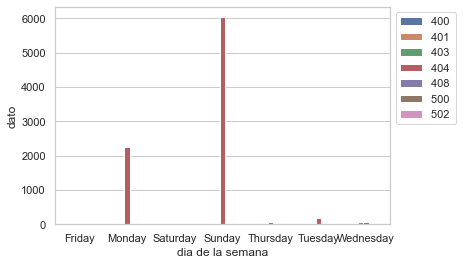

In [294]:
fig = plt.figure()
sns.barplot(x='DiaSetmana', y='dato', hue='CodigError', 
              data=dfgrafica)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.xlabel('dia de la semana')
plt.title=('relaccion entre codigo de error y dia de la semana')
plt.show()

Gràfica amb les correspondéncies entre errors de conecció i dies  de la hores

In [263]:
dfgrafica1=pd.DataFrame(columns={'CodigError','Horas'})
dfgrafica1['CodigError'] = dfconnection['connection_status']
dfgrafica1['Horas'] = dfconnection['Hours']


In [264]:
 dfgrafica1['CodigError']= dfgrafica1[(dfgrafica['CodigError']== '400 ') | 
                        (dfgrafica1['CodigError']== '401 ') |
                        (dfgrafica1['CodigError']== '403 ') |
                        (dfgrafica1['CodigError']== '404 ') |
                        (dfgrafica1['CodigError']== '408 ') |
                        (dfgrafica1['CodigError']== '500 ') |
                        (dfgrafica1['CodigError']== '502 ')
                        ]

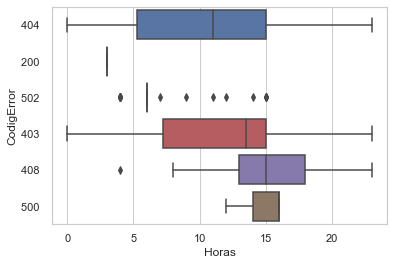

In [292]:
fig3= plt.figure()
sns.boxplot(x='Horas', y='CodigError',data=dfgrafica1)
plt.title=('Codigos error por horas')


Densida de trafico por dias de la semana

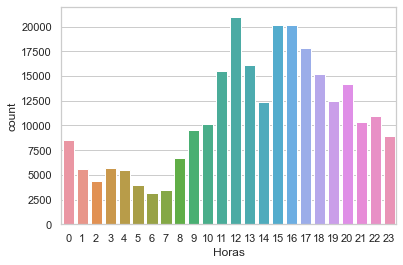

In [287]:
fig4= plt.figure()
sns.countplot(x='Horas', data=dfgrafica1)
plt.title= ('distribucion de conexiones fallidas por horas')